In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras.backend as K
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.losses import *
from keras.preprocessing.image import ImageDataGenerator
import skimage.io as io
import skimage.transform as tr
import skimage.color
import dask.array as da
from glob import glob
from unet import UNet

In [5]:
# Loads the data 
imagePath = '/home/dan/Desktop/Neural Network/data/dataset1_1/images'
maskPath = '/home/dan/Desktop/Neural Network/data/dataset1_1/masks'

image_generator = ImageDataGenerator().flow_from_directory(imagePath, target_size=(224,224), color_mode ='grayscale', batch_size=32, class_mode=None, shuffle=False, save_to_dir = '/home/dan/Desktop/output/images')
mask_generator =  ImageDataGenerator().flow_from_directory(maskPath, target_size=(224,224), color_mode ='grayscale', batch_size=32, class_mode=None, shuffle=False, save_to_dir = '/home/dan/Desktop/output/masks')

print (image_generator[0].shape)
print (mask_generator[0].shape)
    
train_generator = zip(image_generator, mask_generator)


Found 2455 images belonging to 1 classes.
Found 2455 images belonging to 1 classes.
(32, 224, 224, 1)
(32, 224, 224, 1)


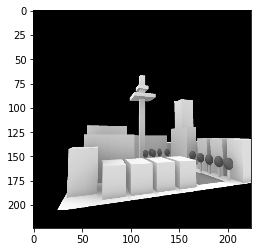

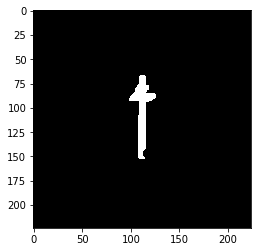

In [15]:
# Plots the images in jupyter notebook for comparison
b = 2
i = 31
plt.imshow(image_generator[b][i, ..., 0], cmap = 'gray')
plt.show()
plt.imshow(mask_generator[b][i, ..., 0], cmap='gray')
plt.show()

In [16]:
# Defining the loss function 
def iou(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1. - intersection)

def iou_loss(y_true, y_pred):
    return  -iou(y_true, y_pred)

In [1]:
# Defining the model 
from unet import UNet
model = None
model = UNet((224,224,1), 1, 16, 4, 2.0)
model.summary()

Using TensorFlow backend.
/opt/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 224, 224, 16) 2320        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 112, 112, 16) 0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [2]:
model.compile(optimizer=Adam(lr=0.0001), loss=iou_loss)

NameError: name 'Adam' is not defined

In [3]:
hist = model.fit_generator(train_generator, steps_per_epoch= 2455//32, epochs=10, verbose=1, shuffle=False)
print (hist.history)

NameError: name 'train_generator' is not defined

In [134]:
model.save('modelsave8.h5')